In [2]:
#Librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Problema 1: Problema de regresión multivariable**

## Carga de data

In [35]:
import requests
from io import StringIO

url = "https://bit.ly/3ovJ7jC"

# Realizar la solicitud GET con verificación SSL deshabilitada
response = requests.get(url, verify=False)
data = pd.read_csv(StringIO(response.content.decode('utf-8')), delimiter='\s+')
data.head()

/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1100: InsecureRequestWarning: Unverified HTTPS request is being made to host 'bit.ly'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1100: InsecureRequestWarning: Unverified HTTPS request is being made to host 'people.stern.nyu.edu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1100: InsecureRequestWarning: Unverified HTTPS request is being made to host 'pages.stern.nyu.edu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


,Year,G,Pg,Y,Pnc,Puc,Ppt,Pd,Pn,Ps,Pop
0,1960,129.7,0.925,6036.0,1.045,0.836,0.810,0.444,0.331,0.302,180.7
1,1961,131.3,0.914,6113.0,1.045,0.869,0.846,0.448,0.335,0.307,183.7
2,1962,137.1,0.919,6271.0,1.041,0.948,0.874,0.457,0.338,0.314,186.5
3,1963,141.6,0.918,6378.0,1.035,0.960,0.885,0.463,0.343,0.320,189.2
4,1964,148.8,0.914,6727.0,1.032,1.001,0.901,0.470,0.347,0.325,191.9


In [36]:
data.tail()

,Year,G,Pg,Y,Pnc,Puc,Ppt,Pd,Pn,Ps,Pop
32,1992,280.2,3.751,11466.0,2.528,4.113,5.518,1.184,1.358,1.625,255.4
33,1993,286.7,3.713,11476.0,2.663,4.470,6.086,1.200,1.379,1.684,258.1
34,1994,290.2,3.732,11636.0,2.754,4.730,6.268,1.225,1.396,1.734,260.7
35,1995,297.8,3.789,11934.0,2.815,5.224,6.410,1.239,1.419,1.786,263.2
36,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
# Eliminar ultima fila
data = data.drop(data.index[-1])

## 1.a

In [39]:
import statsmodels.api as sm

# Añadir  columna para la tendencia temporal
data['T'] = range(1, len(data) + 1)

# Ajustar el modelo de regresión lineal múltiple
X = data[['Pg', 'Y','Pnc', 'Puc', 'Ppt', 'Pd', 'Pn', 'Ps', 'T']]
y = data['G'] / data['Pop']  # Consumo de gasolina per cápita

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

In [40]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     166.5
Date:                Sun, 11 Feb 2024   Prob (F-statistic):           1.16e-20
Time:                        16:18:06   Log-Likelihood:                 93.286
No. Observations:                  36   AIC:                            -166.6
Df Residuals:                      26   BIC:                            -150.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0093      0.203     -0.046      0.9

## 1.b


R-cuadrado : el valor es 0.983, lo cual significa que cerca del 98.5 % de la variabilidad en el consumo de gasolina per cápita puede ser explicada por las variables independientes, es decir que le modelo se ajusta bien a los datos.

Algunos coeficientes tienen valores p mayores a 0.05, lo que sugiere que esas variables no son estadísticamente significativas en el modelo. Específicamente, las variables Pnc, Puc, Ppt, Pd y Pn tienen valores p mayores que 0.05, lo que indica que no hay suficiente evidencia para rechazar la hipótesis nula de que sus coeficientes son iguales a cero.

Por otro lado, las variables Y, Pg y Ps tienen valores p menores o cercanos a 0.05, lo que sugiere que son estadísticamente significativas en el modelo.

Además, el aviso sobre la posible multicolinealidad significa que algunas variables pueden estar altamente correlacionadas entre sí, lo que podría afectar la precisión de las estimaciones de los coeficientes y la interpretación de su significancia.




<ipython-input-38-7aedf3109576>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


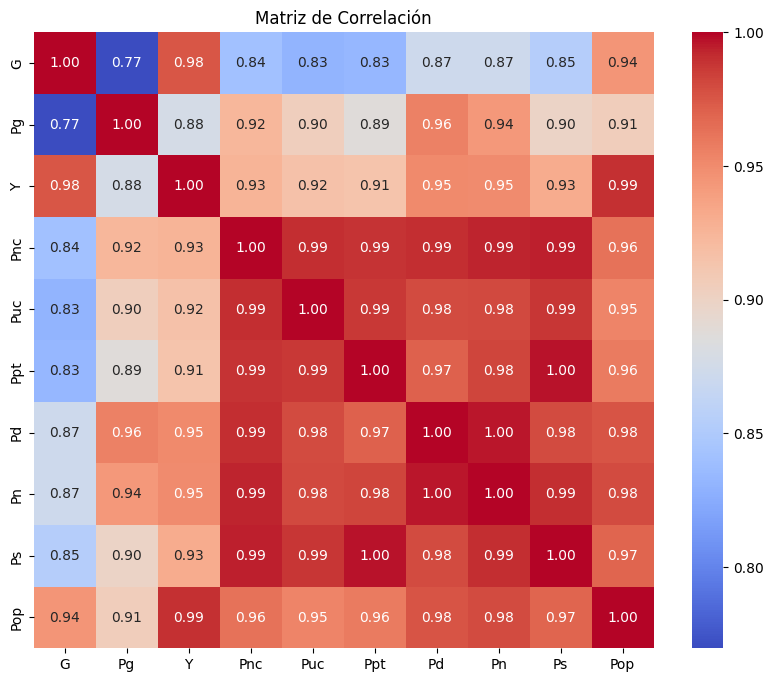

In [38]:
# Calcular la matriz de correlación
correlation_matrix = data.corr()

# Visualizar la matriz de correlación como un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Matriz de Correlación')
plt.show()


Se reestimó el modelo, se utilizo en mismo código anterior, solo que se ha excluido las variables que no son significativas, ademas no se va a considerar la variable 'Y', por temas de multicolinealidad


In [47]:
#data['T'] = range(1, len(data) + 1)

X = data[['Pg', 'T','Ps']]  # Variables significativas
y = data['G'] / data['Pop']  # Consumo de gasolina per cápita

# Ajustar el modelo de regresión lineal múltiple
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

In [48]:
# Imprimir los resultados
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     308.1
Date:                Sun, 11 Feb 2024   Prob (F-statistic):           1.12e-23
Time:                        16:25:40   Log-Likelihood:                 81.157
No. Observations:                  36   AIC:                            -154.3
Df Residuals:                      32   BIC:                            -148.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8286      0.010     86.164      0.0

El  R-cuadrado disminuyó de 0.983 a 0.967. Esto significa que el modelo explica aproximadamente el 96.7% de la variabilidad de la variable dependiente en lugar del 98.3% explicado anteriormente.

El estadístico F aumentó de 166.5 a 308.1, indicando una mejora en la capacidad del modelo para explicar la variabilidad de la variable dependiente.

Los valores p de las variables restantes (Pg, T, Ps) son todos muy bajos (p < 0.05), lo que indica que son estadísticamente significativas en el modelo.

Los coeficientes estimados para las variables Pg, T y Ps también son significativos (sus intervalos de confianza no incluyen el valor cero).

## 1.c

Se plantean las siguientes hipótesis nulas:

*   Hipótesis nula (H0): Los coeficientes de "Pnc" y "Puc" son iguales, lo que significa que los consumidores no diferencian entre los cambios en los precios de los autos nuevos y usados en su demanda de gasolina.
*  Hipótesis alternativa (H1): Los coeficientes de "Pnc" y "Puc" son diferentes, lo que indica que los consumidores sí diferencian entre los cambios en los precios de los autos nuevos y usados en su demanda de gasolina.


In [50]:
# Tendencia temporal
data['T'] = range(1, len(data) + 1)

# Ajustar el modelo de regresión lineal múltiple
X = data[['Pg', 'Y', 'Pnc', 'Puc', 'Ppt', 'Pd', 'Pn', 'Ps', 'T']]
y = data['G'] / data['Pop']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Restringir los coeficientes de Pnc y Puc para que sean iguales
restricciones = 'Pnc - Puc = 0'

# Prueba F
f_test = model.wald_test(restricciones)
valor_p = f_test.pvalue

print("Estadístico F:", f_test.statistic)
print("Valor p:", valor_p)

# Comparar valor p con un nivel de significancia predefinido
nivel_significancia = 0.05
if valor_p < nivel_significancia:
    print("Rechazar la hipótesis nula: los coeficientes de Pnc y Puc son diferentes.")
else:
    print("No se puede rechazar la hipótesis nula: los coeficientes de Pnc y Puc son iguales.")


Estadístico F: [[0.60996426]]
Valor p: 0.4418548435973869
No se puede rechazar la hipótesis nula: los coeficientes de Pnc y Puc son iguales.


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1914: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(


Se obtuvieron los siguientes resultados:

*  El estadístico F calculado para la prueba de hipótesis fue aproximadamente 0.6099.
*  El valor p asociado con este estadístico F fue aproximadamente 0.4419.
Dado que el valor p (0.4419) es mayor que el nivel de significancia predefinido (0.05), no podemos rechazar la hipótesis nula.

En otras palabras, no hay suficiente evidencia para concluir que los coeficientes de Pnc y Puc son diferentes. Por lo tanto, en base a esta prueba, parece que los consumidores no diferencian significativamente entre los cambios en los precios de los autos nuevos y usados en su demanda de gasolina.

# **Problema 2: Clasificador ingenuo de Bayes**

In [ ]:
# Carga de data
data = [
    {"edad": 22, "fuma": 1, "IMC": 25, "diabetes": 0},
    {"edad": 45, "fuma": 0, "IMC": 29, "diabetes": 1},
    {"edad": 37, "fuma": 1, "IMC": 30, "diabetes": 1},
    {"edad": 19, "fuma": 0, "IMC": 22, "diabetes": 0},
    {"edad": 56, "fuma": 1, "IMC": 25, "diabetes": 1},
    {"edad": 33, "fuma": 0, "IMC": 31, "diabetes": 1},
    {"edad": 70, "fuma": 1, "IMC": 26, "diabetes": 0},
    {"edad": 47, "fuma": 1, "IMC": 28, "diabetes": 1},
    {"edad": 27, "fuma": 1, "IMC": 28, "diabetes": 0},
    {"edad": 43, "fuma": 0, "IMC": 31, "diabetes": 1},
    {"edad": 53, "fuma": 1, "IMC": 27, "diabetes": 1},
    {"edad": 62, "fuma": 1, "IMC": 24, "diabetes": 0}
]

data = pd.DataFrame(data)
data.head()

,edad,fuma,IMC,diabetes
0,22,1,25,0
1,45,0,29,1
2,37,1,30,1
3,19,0,22,0
4,56,1,25,1


## 2.a

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [ ]:
# Dividir los datos
X = data[['edad', 'fuma', 'IMC']]
y = data['diabetes']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y ajustar el clasificador Naive Bayes
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Predecir las etiquetas para el conjunto de prueba
y_pred = nb_classifier.predict(X_test)

# Calcular la precisión del clasificador
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del clasificador Naive Bayes:", accuracy)

Precisión del clasificador Naive Bayes: 1.0


Una precisión del clasificador Naive Bayes de 1.0 significa que todas las predicciones realizadas por el clasificador en el conjunto de prueba fueron correctas. En otras palabras, el modelo clasificó correctamente todas las instancias del conjunto de prueba.


## 2.b

In [ ]:
edad = 28
fuma = 1   #Paciente fuma
peso = 81
altura = 1.72
IMC = peso / (altura**2)

In [ ]:
# Características del nuevo paciente
nuevo_paciente_caracteristicas = [[edad,fuma, IMC]]

# Predecir si el paciente tiene diabetes
prediccion_diabetes = nb_classifier.predict(nuevo_paciente_caracteristicas)

print(prediccion_diabetes)

[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


Dado que el resultado es un 0, eso significa que el paciente con las caracteristicas dadas no tiene diabetes, solo se consideraron el peso, si fuma o no y su IMC, ya que el modelo se entreno con esas caracteristica.

El modelo Naive Bayes llega a su predicción calculando la probabilidad de que el paciente tenga diabetes o no, dadas sus características específicas, y luego selecciona la clase con la probabilidad más alta como la predicción final.

## 2.c

La introducción de una nueva categoría de diabetes, como la diabetes tipo 2, impactaría significativamente el modelo, ya que requeriría la obtención de datos adicionales de pacientes con esta condición para su correcta predicción, ya que sin datos de pacientes con diabetes tipo 2, el modelo no sería capaz de aprender patrones distintivos que identifiquen esta categoría.

Además, una vez recopilados estos datos, sería necesario reentrenar el modelo para incorporar la nueva categoría, lo que podría implicar la identificación y adición de características relevantes para mejorar su capacidad predictiva.

Posteriormente, se llevaría a cabo una validación y evaluación exhaustiva del modelo actualizado para garantizar su precisión en la predicción de todas las categorías de diabetes, incluyendo la nueva.




# **Problema 3: Entendimiento de negocio, generación de datos y análisis de impacto**

## 3.a

In [ ]:
n_estudiantes = 100
carreras = ['Ingeniería Civil', 'Ingeniería Comercial', 'Derecho', 'Medicina']

# Generar datos aleatorios
np.random.seed(0)
data = {
    'ID Estudiante': range(1, n_estudiantes + 1),
    'Carrera': np.random.choice(carreras, n_estudiantes),
    'Vulnerabilidad_Socioeconómica': np.random.uniform(1, 5, n_estudiantes),
    'Asistencia(%)' : np.random.randint(20, 100, n_estudiantes),
    'Promedio_notas': np.random.uniform(2, 7, n_estudiantes),
    'Desercion_semestral' : np.random.choice([0, 1], n_estudiantes, p=[0.9, 0.1]),  # 0: no desertó, 1: desertó
    'Cursar_Matemática_0': np.random.choice([0, 1], n_estudiantes),
    'Rendimiento_Académico_Antes': np.random.uniform(3, 7, n_estudiantes),
    'Rendimiento_Académico_Después': np.random.uniform(3, 7, n_estudiantes)
}

data = pd.DataFrame(data)
data.head()

,ID Estudiante,Carrera,Vulnerabilidad_Socioeconómica,Asistencia(%),Promedio_notas,Desercion_semestral,Cursar_Matemática_0,Rendimiento_Académico_Antes,Rendimiento_Académico_Después
0,1,Ingeniería Civil,3.280787,48,3.147209,0,0,5.831670,3.952174
1,2,Medicina,2.754406,22,6.401488,0,1,5.836288,5.323549
2,3,Ingeniería Comercial,4.953495,47,3.568462,0,0,5.446994,3.583481
3,4,Ingeniería Civil,1.408179,43,6.787254,0,0,5.687628,4.342524
4,5,Medicina,1.835507,73,4.358758,0,0,4.790063,5.502112


Se creo una data con 100 estudiantes, la cual tiene las siguientes variables:
* ID Estudiante: Identificador único para cada estudiante en el conjunto de datos, del 1 al 100
* Carrera: Especialización académica que está siguiendo cada estudiante, para este caso son 4 carreras.
* Vulnerabilidad Socioeconómica: Nivel de desventaja económica y social del estudiante.
* Asistencia (%): Porcentaje de asistencia a las asignatura.
* Promedio notas: Promedio de notas.
* Deserción Semestral: Indica si el estudiante abandonó sus estudios durante el semestre.
* Cursar Matemática 0: Variable binaria que indica si el estudiante está cursando "Matemática 0".
* Rendimiento Académico Antes: Promedio de calificaciones en asignaturas críticas antes de "Matemática 0".
* Rendimiento Académico Después: Promedio de calificaciones en asignaturas críticas después de "Matemática 0"



## 3.b

Para evaluar si cursar "Matemática 0" tiene un impacto positivo en el desempeño posterior del estudiante, se propone seguir lo siguiente:

* Separa los datos en dos grupos: uno de estudiantes que cursaron "Matemática 0" y otro de estudiantes que no lo hicieron.

* Comparar el rendimiento académico antes y después: Calcular la diferencia entre el rendimiento académico después y antes para cada grupo de estudiantes.

* Análisis estadístico: Utilizar pruebas estadísticas para comparar las diferencias en el rendimiento académico entre los dos grupos.


* Interpretación de resultados: Analizar los resultados de las pruebas estadísticas para determinar si existe una diferencia significativa en el rendimiento académico entre los dos grupos.

In [ ]:
from scipy.stats import ttest_ind

grupo_matematica_0 = data[data['Cursar_Matemática_0'] == 1]
grupo_no_matematica_0 = data[data['Cursar_Matemática_0'] == 0]

# Calcular la diferencia en el rendimiento académico
dif_rendimiento = grupo_matematica_0['Rendimiento_Académico_Después'] - grupo_matematica_0['Rendimiento_Académico_Antes']
dif_rendimiento_no = grupo_no_matematica_0['Rendimiento_Académico_Después'] - grupo_no_matematica_0['Rendimiento_Académico_Antes']

# Realizar prueba t de Student para muestras independientes
t_stat, p_valor = ttest_ind(dif_rendimiento, dif_rendimiento_no)


if p_valor < 0.05:
    print("Hay una diferencia significativa en el rendimiento académico entre los dos grupos.")
    if dif_rendimiento.mean() > dif_rendimiento_no.mean():
        print("El grupo que cursó Matemática 0 muestra un rendimiento académico posterior superior.")
    else:
        print("El grupo que no cursó Matemática 0 muestra un rendimiento académico posterior superior.")
else:
    print("No hay una diferencia significativa en el rendimiento académico entre los dos grupos.")


No hay una diferencia significativa en el rendimiento académico entre los dos grupos.


Se realizo un pequeño analisis estadístico para evaluar si cursar "Matemática 0" tiene un impacto positivo en el desempeño posterior del estudiante. Solo se consideraron 2 variables ("Rendimiento Académico Antes" y "Rendimiento Académico Despues")

## 3.c

Para realizar un análisis de impacto causal en el campo de la econometría, se ocupara un método conocido como Diferencias en Diferencias (DID).

Para aplicar el método de Diferencias en Diferencias (DID) en este caso específico, donde se esta evaluando el impacto de cursar "Matemática 0" en el rendimiento académico posterior de los estudiantes, se puede seguir los siguientes pasos:

1. Definir los grupos de tratamiento y control: donde el grupo de tratamiento serán los estudiantes que cursaron Matemática 0, y el grupo de control serán los estudiantes que no cursaron Matemática 0.

2. Recopilar datos longitudinales: es necesario datos longitudinales que muestren el rendimiento académico de los estudiantes antes y después de cursar Matemática 0.

3. Crear variables de tratamiento y tiempo: Crear una variable indicadora para el tratamiento (cursar Matemática 0) y otra para el tiempo (antes/después de cursar Matemática 0).

4. Especificar el modelo de DID: Se utilizara un modelo de regresión donde la variable dependiente sea el rendimiento académico, y las variables independientes sean las indicadoras de tratamiento y tiempo, junto con cualquier otra variable de control relevante (como la vulnerabilidad socioeconómica, asistencia, etc.).

5. Estimar el efecto causal usando DID

6. Evaluar la significancia estadística y el tamaño del efecto: Realizar pruebas de hipótesis para determinar si el coeficiente de la interacción entre las variables de tratamiento y tiempo es estadísticamente significativo.

7. Considerar la validez de los supuestos: Verificar los supuestos del método DID, como la paralelidad de tendencias entre el grupo de tratamiento y el grupo de control antes de la intervención.

8. Interpretar los resultados

In [ ]:
import statsmodels.api as sm

# Crear variables indicadoras de tratamiento y tiempo
data['Tratamiento'] = np.where(data['Cursar_Matemática_0'] == 1, 1, 0)
data['Despues'] = np.where(data['Rendimiento_Académico_Después'] > data['Rendimiento_Académico_Antes'], 1, 0)

data['Tratamiento * Despues'] = data['Tratamiento'] * data['Despues']

# Especificar el modelo de DID
X = data[['Tratamiento', 'Despues', 'Tratamiento * Despues', 'Vulnerabilidad_Socioeconómica', 'Asistencia(%)', 'Promedio_notas']]
Y = data['Rendimiento_Académico_Después']
X = sm.add_constant(X)  # Añadir constante al modelo

# Estimar el modelo de regresión
modelo_did = sm.OLS(Y, X).fit()

In [ ]:
print(modelo_did.summary())

                                  OLS Regression Results                                 
Dep. Variable:     Rendimiento_Académico_Después   R-squared:                       0.353
Model:                                       OLS   Adj. R-squared:                  0.311
Method:                            Least Squares   F-statistic:                     8.463
Date:                           Sat, 10 Feb 2024   Prob (F-statistic):           2.47e-07
Time:                                   22:26:23   Log-Likelihood:                -136.03
No. Observations:                            100   AIC:                             286.1
Df Residuals:                                 93   BIC:                             304.3
Df Model:                                      6                                         
Covariance Type:                       nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
--

 El modelo explica aproximadamente el 35.3% de la variabilidad en el rendimiento académico de los estudiantes después de cursar Matemática 0.

 La variable Despues tiene un coeficiente positivo significativo (0.9591) con un valor p muy bajo (0.001), lo que indica que, en promedio, el rendimiento académico de los estudiantes aumenta después de cursar Matemática 0.

 Sin embargo, la interacción Tratamiento * Despues no es estadísticamente significativa (valor p = 0.127), lo que sugiere que no hay suficiente evidencia para afirmar que el efecto de cursar Matemática 0 en el rendimiento académico varía antes y después de la intervención.

 Las variables Tratamiento, Vulnerabilidad_Socioeconómica, Asistencia(%), y Promedio_notas no son estadísticamente significativas en la predicción del rendimiento académico después de cursar Matemática 0 (todos los valores p son mayores que 0.05).

 A modo de conclusión se puede decir que después de cursar Matemática 0, en promedio, los estudiantes tienden a mejorar su rendimiento académico. Sin embargo, no hay suficiente evidencia para afirmar que el efecto de cursar Matemática 0 varía significativamente antes y después de la intervención. Además, las otras variables como la vulnerabilidad socioeconómica, asistencia y promedio de notas no tienen un impacto significativo en el rendimiento académico posterior.